## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [18]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [19]:
train, test = keras.datasets.cifar10.load_data()

In [20]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [21]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
SAVE_ENABLE = [True, False]

In [27]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for save_para in SAVE_ENABLE:
    if save_para == True:
        model_ckpt = ModelCheckpoint(filepath="./tmp.h5", monitor="val_loss", save_weights_only=save_para)
    else:
        model_ckpt = ModelCheckpoint(filepath="./tmp_false.h5", monitor="val_loss", save_weights_only=save_para)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True,
                 callbacks=[model_ckpt])
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-SAVE_BEST_ENABLE-%d"%(save_para)
    results[exp_name_tag] = {"train-loss":train_loss,
                                        "valid-loss":valid_loss,
                                        "train-acc":train_acc,
                                        "valid-acc":valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 5s 94us/step - loss: 0.5222 - acc: 0.8523 - val_loss: 1.6496 - val_acc: 0.4869
Epoch 50/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.5073 - acc: 0.8569 - val_loss: 1.6752 - val_acc: 0.4939
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
__________

Epoch 48/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.5189 - acc: 0.8507 - val_loss: 1.6714 - val_acc: 0.4792
Epoch 49/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.5040 - acc: 0.8575 - val_loss: 1.7059 - val_acc: 0.4846
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4865 - acc: 0.8646 - val_loss: 1.7021 - val_acc: 0.4855


In [28]:
# Load back
model2 = build_mlp(input_shape=x_train.shape[1:])
optimizer2 = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer2)
model2.load_weights("./tmp.h5")
loss_loadback, acc_loadback = model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 113us/step


In [29]:
results

{'exp-SAVE_BEST_ENABLE-1': {'train-loss': [2.205004116859436,
   1.7339165058517456,
   1.614186831588745,
   1.5432445414733886,
   1.4892859308624267,
   1.4452816790771483,
   1.407751415977478,
   1.3720370694732666,
   1.342076375312805,
   1.3124459422302246,
   1.2843421070480348,
   1.258101791305542,
   1.2318498051071167,
   1.2088158367538453,
   1.1841539226913451,
   1.1632857389068603,
   1.140341255569458,
   1.1161557206726074,
   1.0958095291137695,
   1.0727642584991455,
   1.051160122566223,
   1.0306652504730225,
   1.0097181185150146,
   0.9901530019378663,
   0.968033932685852,
   0.9480096794319153,
   0.9287248483848571,
   0.9087349482917786,
   0.8886363166809083,
   0.8694128101539612,
   0.8503643142700196,
   0.8310004671669007,
   0.8119635672950745,
   0.7917136010932923,
   0.7721247658538818,
   0.7541192739868164,
   0.7355054709053039,
   0.71641103931427,
   0.6976325575828553,
   0.679797516746521,
   0.6610600576972961,
   0.6441646023559571,
   0.

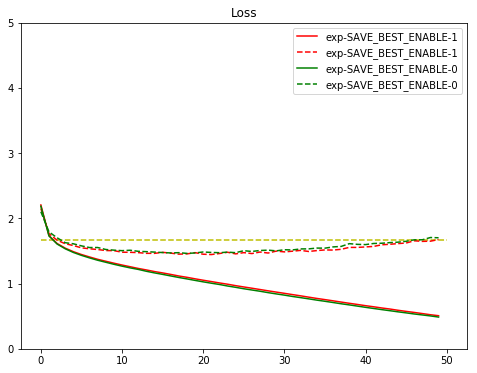

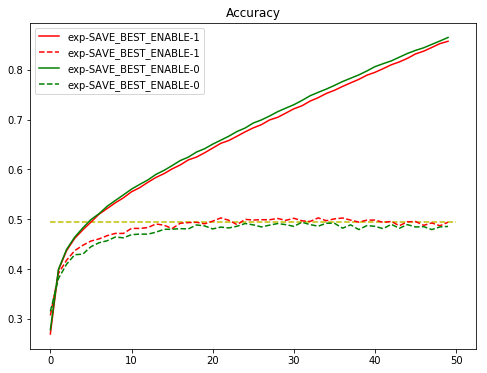

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k","black",'gray','pink']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i<9:
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.hlines(y=loss_loadback, xmin=0, xmax=len(results[cond]['train-loss']), colors='y', linestyles='--')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i<9:
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.hlines(y=acc_loadback, xmin=0, xmax=len(results[cond]['train-acc']), colors='y', linestyles='--')
plt.title("Accuracy")
plt.legend()
plt.show()